In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./MGE303_Term Project_Classification_Data (Disease).csv')

for i in range(len(df["EXER_M"])):
    if df["EXER_M"][i] == "Never":
        df["EXER_M"][i] = 0
    if df["EXER_M"][i] == "Once a week":
        df["EXER_M"][i] = 1
    if df["EXER_M"][i] == "2-3 a week":
        df["EXER_M"][i] = 2
    if df["EXER_M"][i] == '4-5 a week':
        df["EXER_M"][i] = 3
    if df["EXER_M"][i] == '>5 a week':
        df["EXER_M"][i] = 4

C:\ProgramData\Anaconda3\envs\daheeta_mining\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\envs\daheeta_mining\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\envs\daheeta_mining\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main

In [3]:
df.head()

,HY_YN,AGE,gender,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,SGOT_ASL,SGPT_ALT,...,H_APOP_YN,H_HDISE_YN,H_DIABML_YN,F_APOP_YN,F_HDISE_YN,F_HPRT_YN,F_DIABML_YN,DSQTY,SMK_TERM,EXER_M
0,1,66,1,76.0,120.0,70.0,87.0,199.0,22.0,13.0,...,0,0,0,0,0,0,0,0,5,1
1,1,55,1,84.0,110.0,80.0,85.0,178.0,40.0,35.0,...,0,0,0,0,0,0,0,0,0,0
2,1,54,0,84.0,117.0,76.0,92.0,195.0,20.0,20.0,...,0,0,0,0,0,0,0,0,0,1
3,1,29,1,80.0,126.0,82.0,86.0,150.0,25.0,27.0,...,0,0,0,0,0,0,0,1,3,1
4,1,43,1,82.0,130.0,85.0,104.0,134.0,31.0,23.0,...,0,0,0,0,0,0,0,2,3,1


AS WE CAN SEE FROM THE TABLE, THERE'S A FEATURE WHICH HAS STRING VALULE. "EXER_M" IS AN ORDINAL VALUE SO I'M GONNA TRANSFORM IT INTO int.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HY_YN        21613 non-null  int64  
 1   AGE          21613 non-null  int64  
 2   gender       21613 non-null  int64  
 3   WAIST        21569 non-null  float64
 4   BP_HIGH      21610 non-null  float64
 5   BP_LWST      21610 non-null  float64
 6   BLDS         21612 non-null  float64
 7   TOT_CHOLE    21613 non-null  float64
 8   SGOT_ASL     21586 non-null  float64
 9   SGPT_ALT     21591 non-null  float64
 10  GAMMA_GTP    21532 non-null  float64
 11  HMG          21607 non-null  float64
 12  H_APOP_YN    21613 non-null  int64  
 13  H_HDISE_YN   21613 non-null  int64  
 14  H_DIABML_YN  21613 non-null  int64  
 15  F_APOP_YN    21613 non-null  int64  
 16  F_HDISE_YN   21613 non-null  int64  
 17  F_HPRT_YN    21613 non-null  int64  
 18  F_DIABML_YN  21613 non-null  int64  
 19  DSQT

In [5]:
df.head()

,HY_YN,AGE,gender,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,SGOT_ASL,SGPT_ALT,...,H_APOP_YN,H_HDISE_YN,H_DIABML_YN,F_APOP_YN,F_HDISE_YN,F_HPRT_YN,F_DIABML_YN,DSQTY,SMK_TERM,EXER_M
0,1,66,1,76.0,120.0,70.0,87.0,199.0,22.0,13.0,...,0,0,0,0,0,0,0,0,5,1
1,1,55,1,84.0,110.0,80.0,85.0,178.0,40.0,35.0,...,0,0,0,0,0,0,0,0,0,0
2,1,54,0,84.0,117.0,76.0,92.0,195.0,20.0,20.0,...,0,0,0,0,0,0,0,0,0,1
3,1,29,1,80.0,126.0,82.0,86.0,150.0,25.0,27.0,...,0,0,0,0,0,0,0,1,3,1
4,1,43,1,82.0,130.0,85.0,104.0,134.0,31.0,23.0,...,0,0,0,0,0,0,0,2,3,1


In [6]:
cat_feat = ['gender', 'H_APOP_YN', 'H_HDISE_YN', 'H_DIABML_YN', 'F_APOP_YN', 'F_HDISE_YN', 'F_HPRT_YN','F_DIABML_YN','DSQTY','SMK_TERM','EXER_M']

In [7]:
df[cat_feat] = df[cat_feat].astype(object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HY_YN        21613 non-null  int64  
 1   AGE          21613 non-null  int64  
 2   gender       21613 non-null  object 
 3   WAIST        21569 non-null  float64
 4   BP_HIGH      21610 non-null  float64
 5   BP_LWST      21610 non-null  float64
 6   BLDS         21612 non-null  float64
 7   TOT_CHOLE    21613 non-null  float64
 8   SGOT_ASL     21586 non-null  float64
 9   SGPT_ALT     21591 non-null  float64
 10  GAMMA_GTP    21532 non-null  float64
 11  HMG          21607 non-null  float64
 12  H_APOP_YN    21613 non-null  object 
 13  H_HDISE_YN   21613 non-null  object 
 14  H_DIABML_YN  21613 non-null  object 
 15  F_APOP_YN    21613 non-null  object 
 16  F_HDISE_YN   21613 non-null  object 
 17  F_HPRT_YN    21613 non-null  object 
 18  F_DIABML_YN  21613 non-null  object 
 19  DSQT

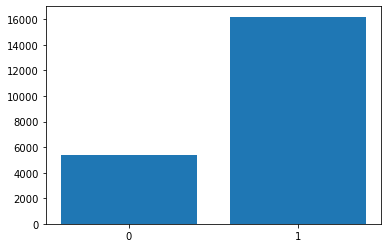

In [9]:
plt.bar(['0', '1'], df['HY_YN'].value_counts(ascending=True))
plt.show()

In [10]:
ratio = len(df['HY_YN'][df['HY_YN'] == 1]) / len(df['HY_YN'][df['HY_YN'] == 0])
print(f'Ratio between 0 : 1 = 1:{ratio:.4f}')

Ratio between 0 : 1 = 1:0.3333


In [11]:
df.describe()

,HY_YN,AGE,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,SGOT_ASL,SGPT_ALT,GAMMA_GTP,HMG
count,21613.000000,21613.000000,21569.000000,21610.000000,21610.000000,21612.000000,21613.000000,21586.000000,21591.000000,21532.000000,21607.000000
mean,0.249988,42.632721,79.605220,118.843822,74.307589,94.031094,191.676954,24.345270,24.870965,33.603427,14.066872
std,0.433016,11.609856,8.996495,11.375061,7.948683,20.924283,35.601369,11.446885,18.145078,32.366754,1.604155
min,0.000000,20.000000,5.000000,80.000000,42.000000,40.000000,66.000000,2.000000,2.000000,2.000000,1.500000
25%,0.000000,33.000000,73.000000,110.000000,70.000000,83.000000,166.000000,18.000000,14.000000,15.000000,13.000000
50%,0.000000,42.000000,80.000000,120.000000,75.000000,91.000000,189.000000,22.000000,20.000000,23.000000,14.100000
75%,0.000000,51.000000,86.000000,130.000000,80.000000,99.000000,213.000000,27.000000,29.000000,38.000000,15.300000
max,1.000000,69.000000,122.000000,139.000000,89.000000,500.000000,468.000000,196.000000,198.000000,300.000000,19.200000


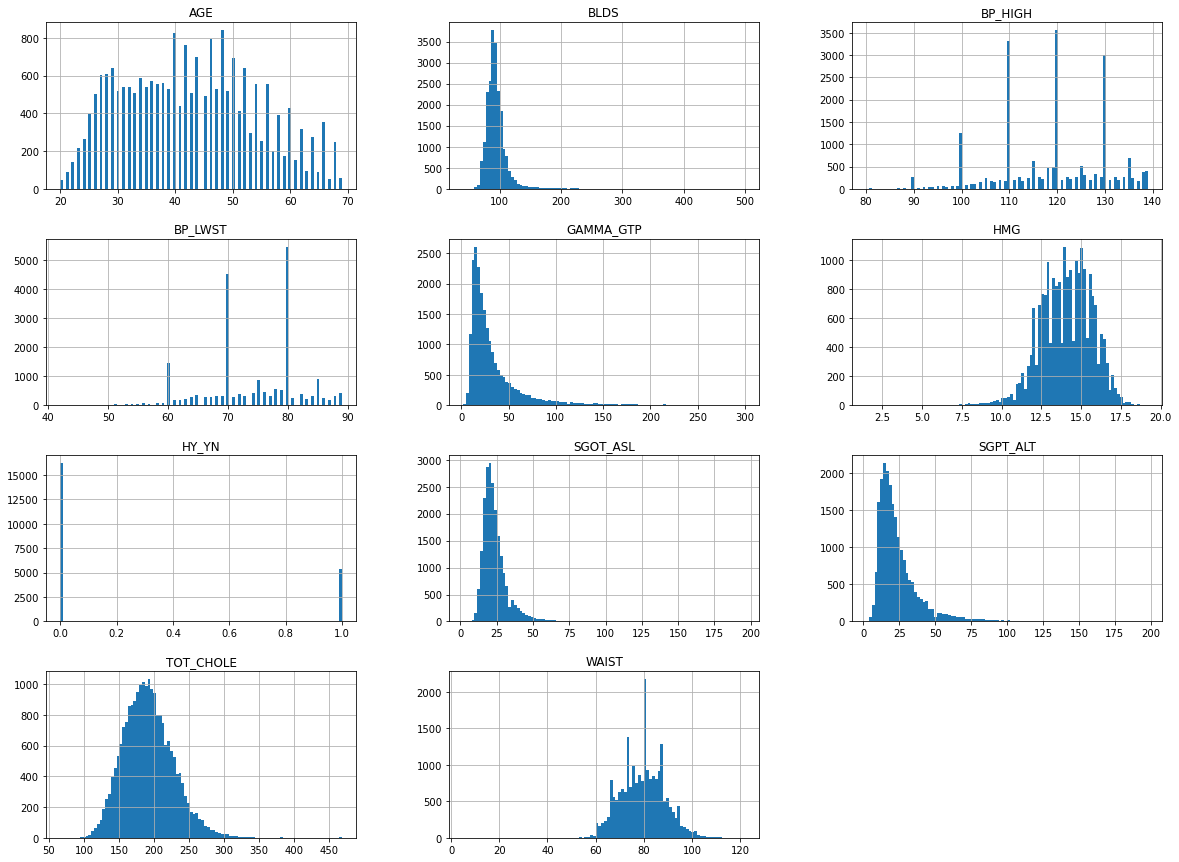

In [12]:
df.hist(bins=100, figsize=(20, 15))
plt.show()

In [13]:
df = df[df['TOT_CHOLE'] < 350]
df = df[df['GAMMA_GTP'] < 200]
df = df[df['SGPT_ALT'] < 100]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21182 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HY_YN        21182 non-null  int64  
 1   AGE          21182 non-null  int64  
 2   gender       21182 non-null  object 
 3   WAIST        21139 non-null  float64
 4   BP_HIGH      21179 non-null  float64
 5   BP_LWST      21179 non-null  float64
 6   BLDS         21181 non-null  float64
 7   TOT_CHOLE    21182 non-null  float64
 8   SGOT_ASL     21178 non-null  float64
 9   SGPT_ALT     21182 non-null  float64
 10  GAMMA_GTP    21182 non-null  float64
 11  HMG          21176 non-null  float64
 12  H_APOP_YN    21182 non-null  object 
 13  H_HDISE_YN   21182 non-null  object 
 14  H_DIABML_YN  21182 non-null  object 
 15  F_APOP_YN    21182 non-null  object 
 16  F_HDISE_YN   21182 non-null  object 
 17  F_HPRT_YN    21182 non-null  object 
 18  F_DIABML_YN  21182 non-null  object 
 19  DSQT

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
training_set, test_set = train_test_split(df, test_size=0.2, random_state=200422, stratify=df[['HY_YN']])

In [17]:
TR_LENGTH = len(training_set)
TE_LENGTH = len(test_set)

print(f'Training samples: {TR_LENGTH}, Test samples: {TE_LENGTH}')

Training samples: 16945, Test samples: 4237


In [18]:
training_set['HY_YN'].value_counts()

0    12760
1     4185
Name: HY_YN, dtype: int64

In [19]:
ratio = len(training_set['HY_YN'][training_set['HY_YN'] == 1]) / len(training_set['HY_YN'][training_set['HY_YN'] == 0])
print(f'Ratio of HY_YN in training set 0 : 1 = 1:{ratio:.4f}')

Ratio of HY_YN in training set 0 : 1 = 1:0.3280


In [20]:
test_set['HY_YN'].value_counts()

0    3191
1    1046
Name: HY_YN, dtype: int64

In [21]:
ratio = len(test_set['HY_YN'][test_set['HY_YN'] == 1]) / len(test_set['HY_YN'][test_set['HY_YN'] == 0])
print(f'Ratio of HY_YN in training set 0 : 1 = 1:{ratio:.4f}')

Ratio of HY_YN in training set 0 : 1 = 1:0.3278


Now See the realtionship between non-numeric variables and the HY_YN

non-numeric values : gender,H_APOP_YN,H_HDISE_YN,H_DIABML_YN,F_APOP_YN,F_HDISE_YN,F_HPRT_YN,F_DIABML_YN,DSQTY

In [22]:
data = training_set.copy()

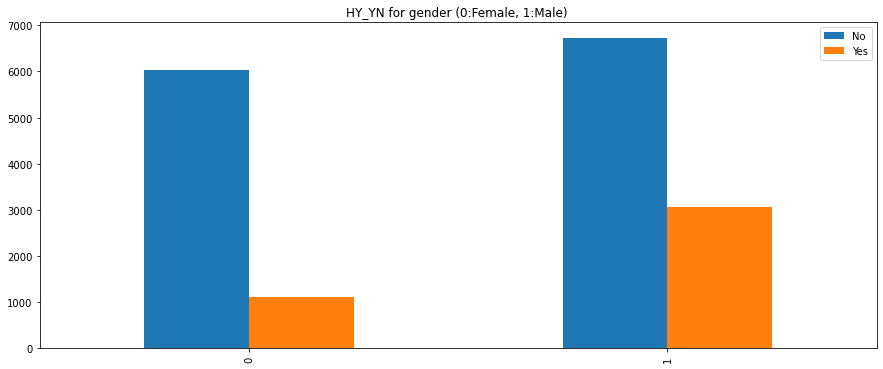

In [23]:
pd.crosstab(data['gender'], data['HY_YN']).plot(kind='bar', figsize=(15, 6))
plt.title('HY_YN for gender (0:Female, 1:Male) ')
plt.xlabel('')
plt.legend(['No', 'Yes'])
plt.show()

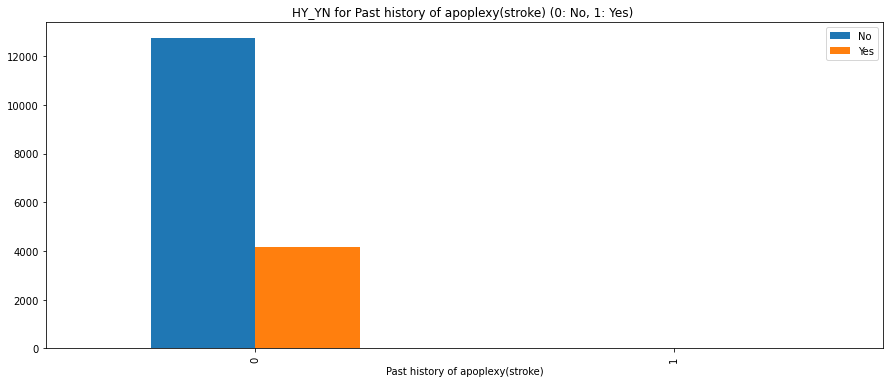

In [24]:
pd.crosstab(data['H_APOP_YN'], data['HY_YN']).plot(kind='bar', figsize=(15, 6))
plt.title('HY_YN for Past history of apoplexy(stroke) (0: No, 1: Yes) ')
plt.xlabel('Past history of apoplexy(stroke)')
plt.legend(['No', 'Yes'])
plt.show()

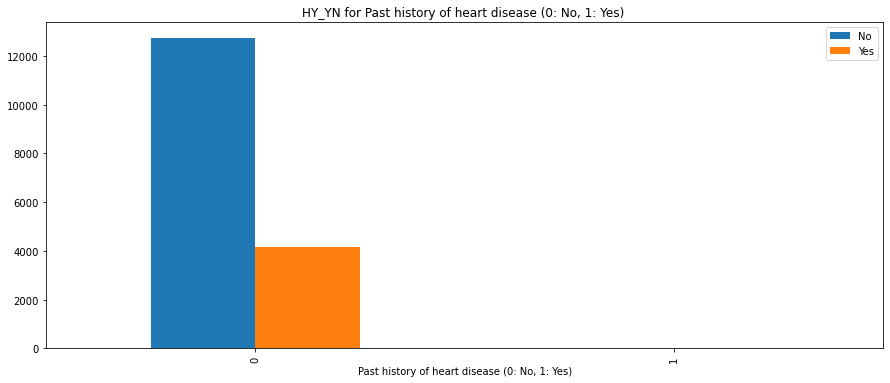

In [25]:
pd.crosstab(data['H_HDISE_YN'], data['HY_YN']).plot(kind='bar', figsize=(15, 6))
plt.title('HY_YN for Past history of heart disease (0: No, 1: Yes) ')
plt.xlabel('Past history of heart disease (0: No, 1: Yes)')
plt.legend(['No', 'Yes'])
plt.show()

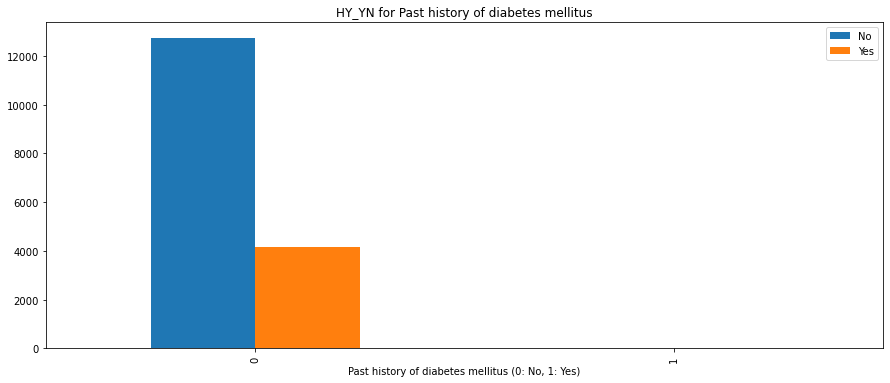

In [26]:
pd.crosstab(data['H_DIABML_YN'], data['HY_YN']).plot(kind='bar', figsize=(15, 6))
plt.title('HY_YN for Past history of diabetes mellitus')
plt.xlabel('Past history of diabetes mellitus (0: No, 1: Yes)')
plt.legend(['No', 'Yes'])
plt.show()

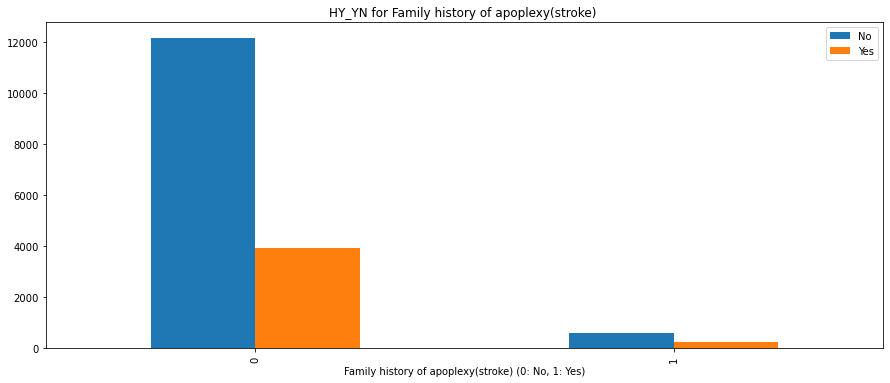

In [27]:
pd.crosstab(data['F_APOP_YN'], data['HY_YN']).plot(kind='bar', figsize=(15, 6))
plt.title('HY_YN for Family history of apoplexy(stroke) ')
plt.xlabel('Family history of apoplexy(stroke) (0: No, 1: Yes)')
plt.legend(['No', 'Yes'])
plt.show()

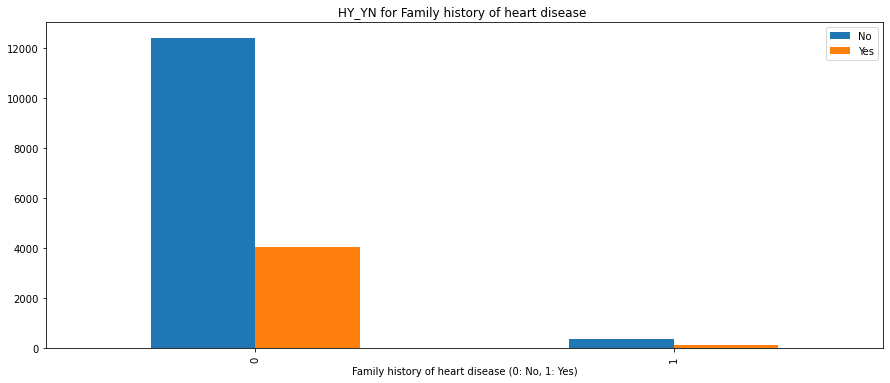

In [28]:
pd.crosstab(data['F_HDISE_YN'], data['HY_YN']).plot(kind='bar', figsize=(15, 6))
plt.title('HY_YN for Family history of heart disease ')
plt.xlabel('Family history of heart disease (0: No, 1: Yes)')
plt.legend(['No', 'Yes'])
plt.show()

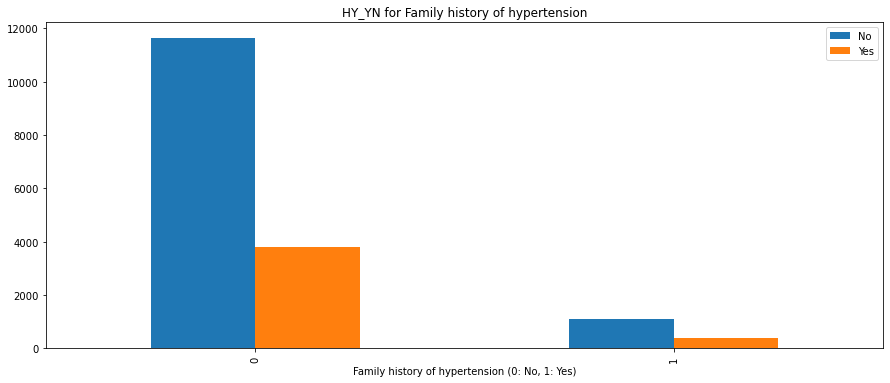

In [29]:
pd.crosstab(data['F_HPRT_YN'], data['HY_YN']).plot(kind='bar', figsize=(15, 6))
plt.title('HY_YN for Family history of hypertension')
plt.xlabel('Family history of hypertension (0: No, 1: Yes)')
plt.legend(['No', 'Yes'])
plt.show()

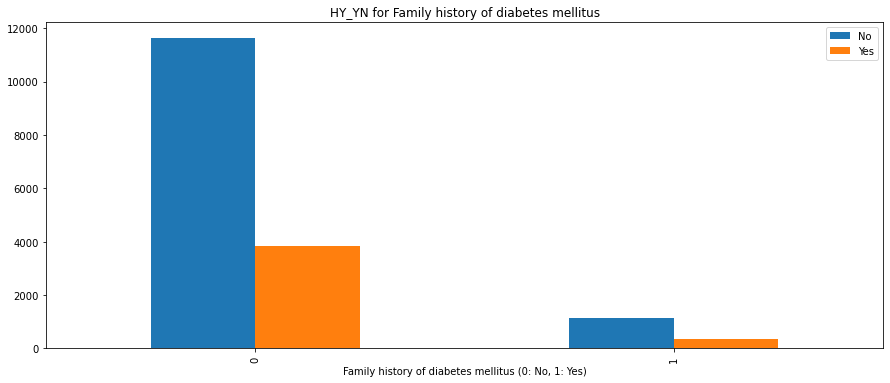

In [30]:
pd.crosstab(data['F_DIABML_YN'], data['HY_YN']).plot(kind='bar', figsize=(15, 6))
plt.title('HY_YN for Family history of diabetes mellitus')
plt.xlabel('Family history of diabetes mellitus (0: No, 1: Yes)')
plt.legend(['No', 'Yes'])
plt.show()

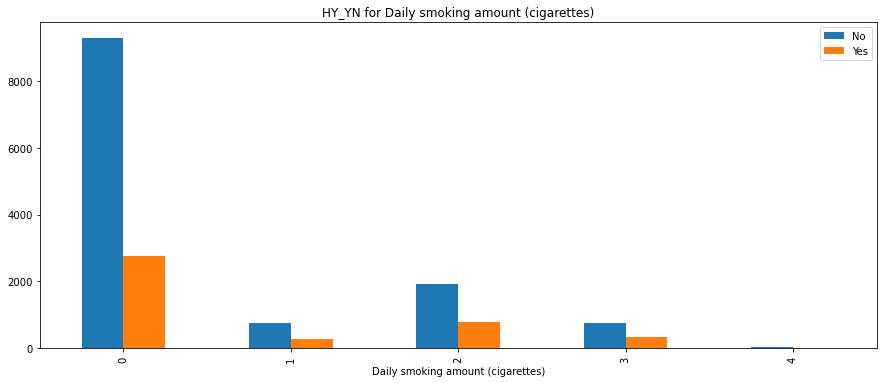

In [31]:
pd.crosstab(data['DSQTY'], data['HY_YN']).plot(kind='bar', figsize=(15, 6))
plt.title('HY_YN for Daily smoking amount (cigarettes)')
plt.xlabel('Daily smoking amount (cigarettes)')
plt.legend(['No', 'Yes'])
plt.show()

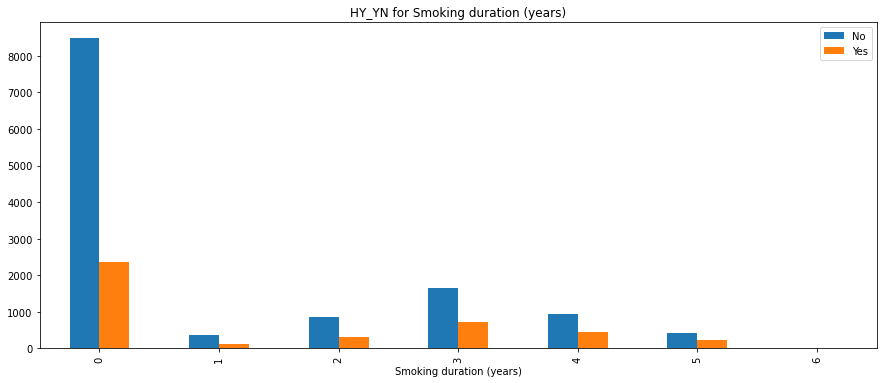

In [32]:
pd.crosstab(data['SMK_TERM'], data['HY_YN']).plot(kind='bar', figsize=(15, 6))
plt.title('HY_YN for Smoking duration (years)')
plt.xlabel('Smoking duration (years)')
plt.legend(['No', 'Yes'])
plt.show()

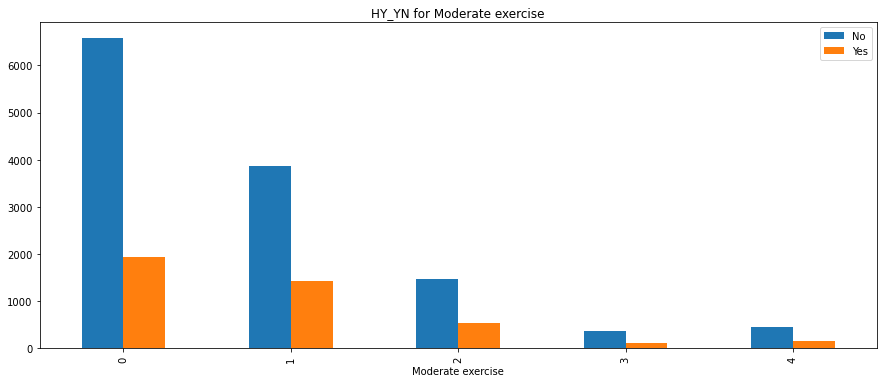

In [33]:
pd.crosstab(data['EXER_M'], data['HY_YN']).plot(kind='bar', figsize=(15, 6))
plt.title('HY_YN for Moderate exercise')
plt.xlabel('Moderate exercise')
plt.legend(['No', 'Yes'])
plt.show()

I want to remove "H_APOP_YN","H_DIABML_YN","H_HDISE_YN" features. Since "H_APOP_YN(Past history of apoplexy(stroke))" and "H_DIABML_YN(ast history of heart disease)" amolst doesn't have any occurred data. Maybe the data was mistakenly collected or the population was biased at first.

In [34]:
test_set['H_APOP_YN'].value_counts()

0    4236
1       1
Name: H_APOP_YN, dtype: int64

In [35]:
test_set['H_DIABML_YN'].value_counts()

0    4227
1      10
Name: H_DIABML_YN, dtype: int64

In [36]:
test_set['H_HDISE_YN'].value_counts()

0    4232
1       5
Name: H_HDISE_YN, dtype: int64

### As we can see, the ouccurence of these two features are too biased. So I'll remove it.

In [37]:
data.drop(data.columns[[12,13,14]],axis = 1, inplace = True)

In [38]:
data.head()

,HY_YN,AGE,gender,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,SGOT_ASL,SGPT_ALT,GAMMA_GTP,HMG,F_APOP_YN,F_HDISE_YN,F_HPRT_YN,F_DIABML_YN,DSQTY,SMK_TERM,EXER_M
15537,0,66,0,78.0,113.0,69.0,192.0,223.0,23.0,20.0,26.0,14.0,0,0,0,1,0,0,2
309,1,46,1,94.0,110.0,80.0,102.0,209.0,17.0,12.0,53.0,14.1,0,0,0,0,0,0,1
20449,0,44,1,84.0,120.0,80.0,99.0,178.0,29.0,28.0,36.0,14.0,0,0,0,0,0,0,0
16077,0,25,1,88.0,120.0,80.0,82.0,235.0,32.0,34.0,32.0,16.0,0,0,0,0,3,2,0
11963,0,52,1,84.0,127.0,81.0,79.0,176.0,31.0,29.0,48.0,15.8,0,0,0,0,0,0,2


* We can also check relationship between two numeric variables along with target label
- Use `scatter()` function in matplotlib package

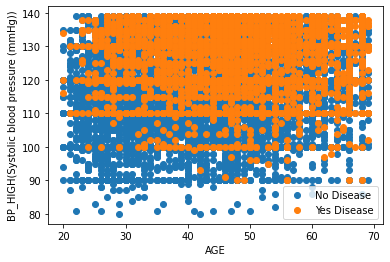

In [39]:
plt.scatter(data['AGE'][data['HY_YN']==0], data['BP_HIGH'][data['HY_YN']==0])
plt.scatter(data['AGE'][data['HY_YN']==1], data['BP_HIGH'][data['HY_YN']==1])
plt.legend(['No Disease', 'Yes Disease'])
plt.xlabel('AGE')
plt.ylabel('BP_HIGH(Systolic blood pressure (mmHg))')
plt.show()

## Investigate the correlation

Investigate the correlation between numerical values using pearson-correlation

In [40]:
list = [data['HY_YN'],data['AGE'], data['WAIST'], data['BP_HIGH'], data['BP_LWST'], data['BLDS'], data['TOT_CHOLE'], data['SGOT_ASL'], data['SGPT_ALT'], data['GAMMA_GTP'], data['HMG']]
df_corr = pd.DataFrame(list)
corr = df_corr.corr(method = 'pearson')
print(corr)

          15537     309       20449     16077     11963     1420      14848  \
15537  1.000000  0.915740  0.922022  0.863916  0.865676  0.909131  0.892311   
309    0.915740  1.000000  0.982138  0.969043  0.974666  0.901356  0.981752   
20449  0.922022  0.982138  1.000000  0.970156  0.988492  0.959377  0.988909   
16077  0.863916  0.969043  0.970156  1.000000  0.966873  0.897077  0.981452   
11963  0.865676  0.974666  0.988492  0.966873  1.000000  0.932104  0.979632   
...         ...       ...       ...       ...       ...       ...       ...   
10770  0.854947  0.974773  0.956760  0.983369  0.967237  0.867485  0.965001   
1273   0.921956  0.968430  0.987340  0.981498  0.972289  0.950328  0.980421   
11247  0.855546  0.956699  0.973036  0.953366  0.984836  0.911632  0.964844   
20609  0.880704  0.976199  0.989699  0.984680  0.990597  0.930834  0.987615   
2914   0.924904  0.986512  0.983541  0.988824  0.967994  0.917969  0.983735   

          14632     12641     560    ...     10506 

### DATA CLEANSING

1. delete the rows with missing features

In [41]:
data.info()
data.dropna(axis=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16945 entries, 15537 to 2914
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HY_YN        16945 non-null  int64  
 1   AGE          16945 non-null  int64  
 2   gender       16945 non-null  object 
 3   WAIST        16906 non-null  float64
 4   BP_HIGH      16943 non-null  float64
 5   BP_LWST      16943 non-null  float64
 6   BLDS         16945 non-null  float64
 7   TOT_CHOLE    16945 non-null  float64
 8   SGOT_ASL     16942 non-null  float64
 9   SGPT_ALT     16945 non-null  float64
 10  GAMMA_GTP    16945 non-null  float64
 11  HMG          16939 non-null  float64
 12  F_APOP_YN    16945 non-null  object 
 13  F_HDISE_YN   16945 non-null  object 
 14  F_HPRT_YN    16945 non-null  object 
 15  F_DIABML_YN  16945 non-null  object 
 16  DSQTY        16945 non-null  object 
 17  SMK_TERM     16945 non-null  object 
 18  EXER_M       16945 non-null  object 
dtypes

,HY_YN,AGE,gender,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,SGOT_ASL,SGPT_ALT,GAMMA_GTP,HMG,F_APOP_YN,F_HDISE_YN,F_HPRT_YN,F_DIABML_YN,DSQTY,SMK_TERM,EXER_M
15537,0,66,0,78.0,113.0,69.0,192.0,223.0,23.0,20.0,26.0,14.0,0,0,0,1,0,0,2
309,1,46,1,94.0,110.0,80.0,102.0,209.0,17.0,12.0,53.0,14.1,0,0,0,0,0,0,1
20449,0,44,1,84.0,120.0,80.0,99.0,178.0,29.0,28.0,36.0,14.0,0,0,0,0,0,0,0
16077,0,25,1,88.0,120.0,80.0,82.0,235.0,32.0,34.0,32.0,16.0,0,0,0,0,3,2,0
11963,0,52,1,84.0,127.0,81.0,79.0,176.0,31.0,29.0,48.0,15.8,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10770,0,43,1,90.0,136.0,76.0,89.0,265.0,26.0,34.0,71.0,16.4,1,1,1,1,0,0,0
1273,1,44,0,74.0,109.0,67.0,90.0,187.0,28.0,34.0,17.0,12.0,0,0,0,0,0,0,0
11247,0,58,0,77.0,132.0,77.0,68.0,184.0,16.0,11.0,20.0,12.9,0,0,0,0,0,0,1
20609,0,32,1,73.0,125.0,76.0,80.0,187.0,21.0,25.0,35.0,15.9,0,0,0,0,2,3,2


In [42]:
num_feat = ['AGE','WAIST','BP_HIGH','BP_LWST','BLDS','TOT_CHOLE','SGOT_ASL','SGPT_ALT','GAMMA_GTP','HMG']
nom_feat = ['gender', 'F_APOP_YN', 'F_HDISE_YN','F_HPRT_YN','F_DIABML_YN']
ord_feat = ['DSQTY','SMK_TERM','EXER_M']

In [43]:
X_train, y_train = data.drop(columns=['HY_YN'], axis=1, inplace=False), data['HY_YN'].values

In [44]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [45]:
ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder()

ohe.fit(X_train[nom_feat].values)
oe.fit(X_train[ord_feat].values)

X_train_nom = ohe.transform(X_train[nom_feat].values)
X_train_ord = oe.transform(X_train[ord_feat].values)

#### Scale data
* Feature scaling means to transform ranges of all **numerical** features to be similar with each other. <br> (it is enough to just one-hot-encode categorical features)
* Standard scaling (standardization) is to make feature to have mean 0 and standard deviation 1.
  - It is **TOTALLY different** from converting data distribution to Gaussian ditsribution!!!
  - Except for models having assumption of Gaussian distributed data, such as Linear Discriminant analysis, Gaussian Mixture models, <br>
  it is NOT needed to convert data distribution to be Gaussian.
  - It is just shift the range of feature distribution
* Feature scaling is especially important for algorithms:
  - based on Euclidean distance like K-means clustering, k-NN (different scale distorts distance measure)
  - based on gradient-based optimizations like logistic regression, neural networks (different scales distorts loss surface)
  - regard scale of features with significance like PCA

##### Scale numerical features
- Scale numerical features to have mean 0 and standard deviation 1
- Use `StandardScaler` provided by Scikit-Learn package
- Select numerical feature columns and call `fit_trnasform()` method

In [46]:
from sklearn.preprocessing import StandardScaler
    
scalar = StandardScaler()
scalar.fit(X_train[num_feat].values)
X_train_num = scalar.transform(X_train[num_feat].values)

In [47]:
X_train_num.shape

(16945, 10)

##### Finish up data pre-processing
- Now, we need to concatenate categorical (one-hot encoded) and numerical (standardized) features!
- It can be easily done by `np.concatenate([*arrays], axis=1)` method

In [48]:
X_train = np.concatenate([X_train_num, X_train_ord, X_train_nom], axis=1)
X_train.shape

(16945, 23)

### Do the same thing for test_set

In [49]:
test_data = test_set.copy()

In [50]:
test_data.info()
test_data.dropna(axis=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 18979 to 15597
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HY_YN        4237 non-null   int64  
 1   AGE          4237 non-null   int64  
 2   gender       4237 non-null   object 
 3   WAIST        4233 non-null   float64
 4   BP_HIGH      4236 non-null   float64
 5   BP_LWST      4236 non-null   float64
 6   BLDS         4236 non-null   float64
 7   TOT_CHOLE    4237 non-null   float64
 8   SGOT_ASL     4236 non-null   float64
 9   SGPT_ALT     4237 non-null   float64
 10  GAMMA_GTP    4237 non-null   float64
 11  HMG          4237 non-null   float64
 12  H_APOP_YN    4237 non-null   object 
 13  H_HDISE_YN   4237 non-null   object 
 14  H_DIABML_YN  4237 non-null   object 
 15  F_APOP_YN    4237 non-null   object 
 16  F_HDISE_YN   4237 non-null   object 
 17  F_HPRT_YN    4237 non-null   object 
 18  F_DIABML_YN  4237 non-null   object 
 19  D

,HY_YN,AGE,gender,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,SGOT_ASL,SGPT_ALT,...,H_APOP_YN,H_HDISE_YN,H_DIABML_YN,F_APOP_YN,F_HDISE_YN,F_HPRT_YN,F_DIABML_YN,DSQTY,SMK_TERM,EXER_M
18979,0,57,1,73.0,110.0,70.0,99.0,167.0,18.0,25.0,...,0,0,0,0,0,0,0,2,3,1
705,1,68,0,89.0,110.0,70.0,91.0,201.0,24.0,19.0,...,0,0,0,0,0,0,0,0,0,4
16650,0,52,0,62.0,96.0,60.0,77.0,177.0,41.0,39.0,...,0,0,0,0,1,0,0,0,0,0
17052,0,48,1,84.0,107.0,65.0,95.0,188.0,32.0,27.0,...,0,0,0,0,0,0,0,0,4,2
13092,0,57,1,70.0,110.0,79.0,79.0,210.0,22.0,14.0,...,0,0,0,0,0,0,0,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19855,0,45,0,74.0,102.0,66.0,93.0,185.0,21.0,16.0,...,0,0,0,0,0,0,0,0,0,1
17062,0,64,0,91.0,120.0,80.0,102.0,213.0,14.0,20.0,...,0,0,0,0,0,0,0,0,0,0
12371,0,46,0,73.0,120.0,76.0,87.0,193.0,21.0,9.0,...,0,0,0,0,0,0,0,0,0,2
15976,0,51,1,85.0,115.0,75.0,122.0,185.0,20.0,34.0,...,0,0,0,0,0,0,0,0,0,2


In [51]:
num_feat = ['AGE','WAIST','BP_HIGH','BP_LWST','BLDS','TOT_CHOLE','SGOT_ASL','SGPT_ALT','GAMMA_GTP','HMG']
nom_feat = ['gender', 'F_APOP_YN', 'F_HDISE_YN','F_HPRT_YN','F_DIABML_YN']
ord_feat = ['DSQTY','SMK_TERM','EXER_M']

In [52]:
X_test, y_test = data.drop(columns=['HY_YN'], axis=1, inplace=False), data['HY_YN'].values

In [53]:
ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder()

ohe.fit(X_test[nom_feat].values)
oe.fit(X_test[ord_feat].values)

X_test_nom = ohe.transform(X_test[nom_feat].values)
X_test_ord = oe.transform(X_test[ord_feat].values)

### Logistic Regression Approach ###

In [62]:
# Logistic Regression Approach
feat = ['WAIST','BP_HIGH','BP_LWST','BLDS','TOT_CHOLE','SGOT_ASL','SGPT_ALT','GAMMA_GTP','HMG']
df = df.fillna(0)
df[feat] = df[feat].astype('int32')
feature_df = df
df.info()
 
X = np.asarray(feature_df)
y = np.asarray(df['HY_YN'])
#df -> train and test data
# train(x,y) x is 2d array, y is 1d araay


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21182 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   HY_YN        21182 non-null  int64
 1   AGE          21182 non-null  int64
 2   gender       21182 non-null  int64
 3   WAIST        21182 non-null  int32
 4   BP_HIGH      21182 non-null  int32
 5   BP_LWST      21182 non-null  int32
 6   BLDS         21182 non-null  int32
 7   TOT_CHOLE    21182 non-null  int32
 8   SGOT_ASL     21182 non-null  int32
 9   SGPT_ALT     21182 non-null  int32
 10  GAMMA_GTP    21182 non-null  int32
 11  HMG          21182 non-null  int32
 12  H_APOP_YN    21182 non-null  int64
 13  H_HDISE_YN   21182 non-null  int64
 14  H_DIABML_YN  21182 non-null  int64
 15  F_APOP_YN    21182 non-null  int64
 16  F_HDISE_YN   21182 non-null  int64
 17  F_HPRT_YN    21182 non-null  int64
 18  F_DIABML_YN  21182 non-null  int64
 19  DSQTY        21182 non-null  int64
 20  SMK_TE

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 200530, stratify = y)

num_feat = ['AGE','WAIST','BP_HIGH','BP_LWST','BLDS','TOT_CHOLE','SGOT_ASL','SGPT_ALT','GAMMA_GTP','HMG']
nom_feat = ['gender', 'F_APOP_YN', 'F_HDISE_YN','F_HPRT_YN','F_DIABML_YN']
ord_feat = ['DSQTY','SMK_TERM','EXER_M']


X_train, y_train = data.drop(columns=['HY_YN'], axis=1, inplace=False), data['HY_YN'].values
ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder()

ohe.fit(X_train[nom_feat].values)
oe.fit(X_train[ord_feat].values)

X_train_nom = ohe.transform(X_train[nom_feat].values)
X_train_ord = oe.transform(X_train[ord_feat].values)

X_train, y_train = data.drop(columns=['HY_YN'], axis=1, inplace=False), data['HY_YN'].values

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X_train[num_feat].values)
X_train_num = scalar.transform(X_train[num_feat].values)

X_train = np.concatenate([X_train_num, X_train_ord, X_train_nom], axis=1)

In [56]:
ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder()

num_feat = ['AGE','WAIST','BP_HIGH','BP_LWST','BLDS','TOT_CHOLE','SGOT_ASL','SGPT_ALT','GAMMA_GTP','HMG']
nom_feat = ['gender', 'F_APOP_YN', 'F_HDISE_YN','F_HPRT_YN','F_DIABML_YN']
ord_feat = ['DSQTY','SMK_TERM','EXER_M']

X_test, y_test = data.drop(columns=['HY_YN'], axis=1, inplace=False), data['HY_YN'].values
ohe.fit(X_test[nom_feat].values)
oe.fit(X_test[ord_feat].values)

X_test_nom = ohe.transform(X_test[nom_feat].values)
X_test_ord = oe.transform(X_test[ord_feat].values)

scalar = StandardScaler()
scalar.fit(X_test[num_feat].values)
X_test_num = scalar.transform(X_test[num_feat].values)

X_test = np.concatenate([X_test_num, X_test_ord, X_test_nom], axis=1)


In [72]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
#instantiate the model
logReg = LogisticRegression()
#fit the model
logReg.fit(X_train, y_train)
y_predict = logReg.predict(X_test)

print("Accuracy is: ",metrics.accuracy_score(y_test, y_predict))


Accuracy is:  0.9801746518763276


C:\ProgramData\Anaconda3\envs\daheeta_mining\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
log_reg_cw = LogisticRegression(class_weight='balanced')
log_reg_cw.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\daheeta_mining\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring='roc_auc', cv=10)
scores

C:\ProgramData\Anaconda3\envs\daheeta_mining\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\daheeta_mining\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

array([0.99999813, 0.99823808, 0.99997007, 0.99976059, 0.99942766,
       0.998082  , 0.97817267, 0.99999625, 0.99995313, 0.98482474])

In [93]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [94]:
log_reg_cw.score(X_train, y_train)

0.9991737975804073

In [95]:
print(f'Scores: {scores},\nMean: {np.mean(scores):.4f},\nStd: {np.std(scores):.4f}')

Scores: [0.99999813 0.99823808 0.99997007 0.99976059 0.99942766 0.998082
 0.97817267 0.99999625 0.99995313 0.98482474],
Mean: 0.9958,
Std: 0.0074


In [96]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, precision_recall_fscore_support,\
roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

print(sklearn.metrics.SCORERS['precision'])

print(metrics.precision_score(y_test, y_predict))
print(metrics.recall_score(y_test, y_predict))
print(metrics.f1_score(y_test, y_predict))

make_scorer(precision_score, average=binary)
0.9598470363288719
0.9598470363288719
0.9598470363288719


### KNN Approach

In [58]:
# KNN Approach, k = 4
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
feat = ['WAIST','BP_HIGH','BP_LWST','BLDS','TOT_CHOLE','SGOT_ASL','SGPT_ALT','GAMMA_GTP','HMG']
df = df.fillna(0)
df[feat] = df[feat].astype('int64')
#input data Xall
Xall = df

# target data yall
yall = df['HY_YN'].values

xTrain, xTest, yTrain, yTest = train_test_split(Xall, yall, test_size = 0.2, random_state = 200530, stratify = yall)
knn = KNeighborsClassifier(n_neighbors=4)



knn.fit(xTrain, yTrain)

print("Accuracy is : ", knn.score(xTest, yTest))



Accuracy is :  0.741090394146802


In [101]:
print("\nKNN - <classification matrics>\n", classification_report(y_test, y_predict))


KNN - <classification matrics>
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3191
           1       0.96      0.96      0.96      1046

    accuracy                           0.98      4237
   macro avg       0.97      0.97      0.97      4237
weighted avg       0.98      0.98      0.98      4237



In [61]:
# KNN Approach, k = 5
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
feat = ['WAIST','BP_HIGH','BP_LWST','BLDS','TOT_CHOLE','SGOT_ASL','SGPT_ALT','GAMMA_GTP','HMG']
df = df.fillna(0)
df[feat] = df[feat].astype('int64')
#input data Xall
Xall = df

# target data yall
yall = df['HY_YN'].values

xTrain, xTest, yTrain, yTest = train_test_split(Xall, yall, test_size = 0.2, random_state = 200530, stratify = yall)
knn = KNeighborsClassifier(n_neighbors=5)



knn.fit(xTrain, yTrain)

print("Accuracy is : ", knn.score(xTest, yTest)*100)

Accuracy is :  0.725041302808591


In [59]:
# KNN Approach, k = 6
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
feat = ['WAIST','BP_HIGH','BP_LWST','BLDS','TOT_CHOLE','SGOT_ASL','SGPT_ALT','GAMMA_GTP','HMG']
df = df.fillna(0)
df[feat] = df[feat].astype('int64')
#input data Xall
Xall = df

# target data yall
yall = df['HY_YN'].values

xTrain, xTest, yTrain, yTest = train_test_split(Xall, yall, test_size = 0.2, random_state = 200530, stratify = yall)
knn = KNeighborsClassifier(n_neighbors=5)



knn.fit(xTrain, yTrain)

print("Accuracy is : ", knn.score(xTest, yTest))

Accuracy is :  0.725041302808591


### SVM approach

In [103]:
# SVM Approach

from sklearn import svm
"""
1   gender       20438 non-null  object
2   H_APOP_YN    20438 non-null  object
3   H_HDISE_YN   20438 non-null  object
4   H_DIABML_YN  20438 non-null  object
5   F_APOP_YN    20438 non-null  object
6   F_HDISE_YN   20438 non-null  object
7   F_HPRT_YN    20438 non-null  object
8   F_DIABML_YN  20438 non-null  object
9   DSQTY        20438 non-null  object
10  SMK_TERM     20438 non-null  object
"""
feat = ['WAIST','BP_HIGH','BP_LWST','BLDS','TOT_CHOLE','SGOT_ASL','SGPT_ALT','GAMMA_GTP','HMG']
df = df.fillna(0)
df[feat] = df[feat].astype('int64')
feature_df = df
 
X = np.asarray(feature_df)
y = np.asarray(df['HY_YN'])
#df -> train and test data
# train(x,y) x is 2d array, y is 1d araay
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

#(16350, 9)
# X_train.shape
# (16350,)
# y_train.shape
#SVC = support vector classifier -> data that is near to hyperplane
classifier = svm.SVC(kernel = 'linear') 
"""
kernel = type of hyperplane
kernel = linear, polynomial, radial basis function, sigmoid
C = penalty
"""
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

#Evaluation (result)
from sklearn import metrics
print("Accuracy is: ",metrics.accuracy_score(y_test, y_predict))
#precision equation:
# """
# True Positive / True Positive + False Positive
#     or
# True Positive / Total Predicted Positive
# """

Accuracy is:  1.0


### Evaluate the SVM model

In [104]:
print(metrics.precision_score(y_test, y_predict))
print(metrics.recall_score(y_test, y_predict))
print(metrics.f1_score(y_test, y_predict))

1.0
1.0
1.0
